In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import TensorBoard
import tensorflow as tf

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
batch_size = 50
nb_classes = 10
nb_epoch = 10

#loading the dataset(mnist)
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lab2/heart.csv").values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:13], dataset[:,13],
                                                    test_size=0.25, random_state=87)
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.reshape(100, 784)
# X_test = X_test.reshape(5000, 784)
print(X_train)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(Y_train, nb_classes)
Y_Test = np_utils.to_categorical(Y_test, nb_classes)

[[58.  1.  0. ...  2.  0.  3.]
 [60.  0.  3. ...  2.  0.  2.]
 [62.  0.  0. ...  1.  3.  2.]
 ...
 [43.  1.  0. ...  1.  4.  3.]
 [67.  0.  0. ...  2.  2.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [17]:
#performing Logistic_regression
model = Sequential()
model.add(Dense(output_dim=10, input_shape=(13,), init='normal', activation='softmax'))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(13,), activation="softmax", units=10, kernel_initializer="normal")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [18]:
#tensorboard graph genertion
tensorboard = TensorBoard(log_dir="logslo1/{}",histogram_freq=0, write_graph=True, write_images=True)
history=model.fit(X_train, Y_Train, nb_epoch=nb_epoch, batch_size=batch_size,callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
227/227 [==============================] - 0s 1ms/step - loss: 2.2681 - accuracy: 0.1454
Epoch 2/10
227/227 [==============================] - 0s 39us/step - loss: 2.2239 - accuracy: 0.5022
Epoch 3/10
227/227 [==============================] - 0s 44us/step - loss: 2.1920 - accuracy: 0.5066
Epoch 4/10
227/227 [==============================] - 0s 42us/step - loss: 2.1636 - accuracy: 0.5066
Epoch 5/10
227/227 [==============================] - 0s 50us/step - loss: 2.1369 - accuracy: 0.5066
Epoch 6/10
227/227 [==============================] - 0s 49us/step - loss: 2.1113 - accuracy: 0.5066
Epoch 7/10
227/227 [==============================] - 0s 38us/step - loss: 2.0864 - accuracy: 0.5066
Epoch 8/10
227/227 [==============================] - 0s 41us/step - loss: 2.0619 - accuracy: 0.5066
Epoch 9/10
227/227 [==============================] - 0s 37us/step - loss: 2.0377 - accuracy: 0.5066
Epoch 10/10
227/227 [==============================] - 0s 44us/step - loss: 2.0138 - accurac

In [19]:
#predicting the accuracy of the model
score = model.evaluate(X_test, Y_Test, verbose=1)
print('Loss: %.2f, Accuracy: %.2f' % (score[0], score[1]))


76/76 [==============================] - 0s 512us/step
Loss: 1.99, Accuracy: 0.64


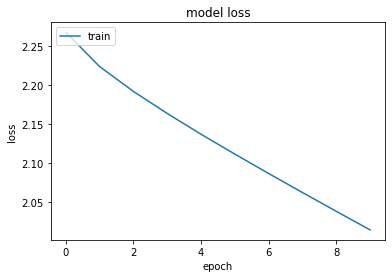

In [20]:
#plotting the loss
plt.plot(history.history['loss'])
# plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()